# **Tutoriel 1: Apprentissage surpervisé: regression lineaire sur le Dataset Bouston_housting** 
# *Tutorial 1:Supervised learning: linear regression on the bouston_housting Dataset*

# I- **PREPARATION DE L'ENVIRONEMMENT DE TRAVAIL**
# (*PREPARATION OF THE WORKING ENVIRONMENT*)

## I.1.**importation des bibiotheques necessaires**
## (*import of the necessary libraries*) 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os,sys


In [2]:
display('AUTEUR ** TCHOTANEU NGATCHA GIRESSE')
display('tutorial 1  : Supersed_LEARNING (linear regression )  ** tutouriel 1 : Apprentissage_superfisée( regression lineaire)')
start_time = datetime.datetime.now()
print('Run time :', start_time.strftime("%A %d %B %Y, %H:%M:%S"))

'AUTEUR ** TCHOTANEU NGATCHA GIRESSE'

'tutorial 1  : Supersed_LEARNING (linear regression )  ** tutouriel 1 : Apprentissage_superfisée( regression lineaire)'

Run time : Wednesday 24 August 2022, 09:58:37


## I.2. .**Définition d'une fonction pour l'affichage des résultats** [ce n'est pas obligatoire]
### (*definition of a function for the display of results*)[ this is not obligatory ]

In [3]:
def plot_history(history, figsize=(8,6), 
                 plot={"Accuracy":['accuracy','val_accuracy'], 'Loss':['loss', 'val_loss']}):
  
    fig_id=0
    for title,curves in plot.items():
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.ylabel(title)
        plt.xlabel('Epoch')
        for c in curves:
            plt.plot(history.history[c])
        plt.legend(curves, loc='upper left')
        fig_id+=1
        plt.show()


  **********************************************description des attributs du dataset ****************************************
 - CRIM : Il s'agit du taux de criminalité par habitant par ville.
 - ZN : Il s'agit de la proportion de terrains résidentiels dans la zone ou l'habitation se trouve defini pour des lots de plus de 25 000 pieds carrés.
 - INDUS : Il s'agit de la proportion vulgarisation des entreprises non commerciales par ville.
 - CHAS : Variable muette de la rivière Charles (égale à 1 si la parcelle est bordée par la rivière, 0 sinon).
 - NOX : Concentration d'oxyde nitrique.
 - RM : Il s'agit du nombre moyen de pièces par logement
 - AGE : Il s'agit de la proportion de logements occupés par leur propriétaire et construits avant 1940.
 - DIS : Il s'agit des distances pondérées par rapport à cinq centres d'emploi de Boston.
 - RAD : Il s'agit de l'indice d'accessibilité aux autoroutes.
 - TAX : Il s'agit du taux d'impôt foncier en valeur totale pour 10 000 dollars.
 - PTRATIO : Il s'agit du ratio élèves/professeurs par ville.
 - B : Calculé comme suit : 1000(Bk - 0,63)^2, où Bk est la proportion de personnes d'origine afro-américaine par ville.
 - LSTAT : Il s'agit du pourcentage de la population de statut inférieur.
 - MEDV : Il s'agit de la valeur moyenne des maisons occupées par leur propriétaire en 1000 dollars.
 
 **********************************************description  dataset'attributes ****************************************
 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
 

# II. **PREPARATION DES DONNEES**
# (*PREPARATION OF DATA*)

## II.1.- **CHARGEMENT DU DATASET et verification ces données manquantes**
## (*LOADING THE DATASET*)

In [4]:
data = pd.read_csv(f'C:/Users/TCHOTANEU/LesProjetsGiresse/datasets/BHPD/origine/BostonHousing.csv', header=0)
display(data.head(5).style.format("{0:.2f}").set_caption("quelques lignes de données :"))
print('données manquantes : ',data.isna().sum().sum(), ' la taille du dataset est : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


données manquantes :  0  la taille du dataset est :  (506, 14)


## II.2 repartitionn du daset en donnees de d'entrainement et de donnees de test 

In [5]:
data       = data.sample(frac=1., axis=0)
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


## II.3-  **NORMALISATION DES DONNEES**
## *(Data Normalisation)*

In [6]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Avant la normalisation des données:"))
mean=x_train.mean()
std = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("Apres la normalisation des donnés  :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Quelque lignes du datases :"))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.76,9.93,11.44,0.08,0.56,6.26,69.62,3.67,9.81,411.77,18.56,356.50,13.02
std,8.89,21.01,6.75,0.27,0.12,0.68,28.20,1.97,8.83,170.73,2.09,90.91,7.27
min,0.01,0.00,0.46,0.00,0.39,3.86,2.90,1.13,1.00,188.00,13.00,0.32,1.92
25%,0.09,0.00,5.64,0.00,0.46,5.89,45.73,2.03,4.00,277.50,17.40,376.12,7.21
50%,0.27,0.00,9.90,0.00,0.54,6.19,79.75,3.19,5.00,332.00,19.10,391.61,11.68
75%,4.08,0.00,18.10,0.00,0.65,6.56,94.50,5.00,24.00,666.00,20.20,396.23,17.54
max,88.98,95.00,27.74,1.00,0.87,8.72,100.00,10.59,24.00,711.00,22.00,396.90,36.98


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.47,-1.63,-0.29,-1.49,-3.50,-2.37,-1.29,-1.00,-1.31,-2.67,-3.92,-1.53
25%,-0.41,-0.47,-0.86,-0.29,-0.86,-0.54,-0.85,-0.83,-0.66,-0.79,-0.56,0.22,-0.80
50%,-0.39,-0.47,-0.23,-0.29,-0.20,-0.10,0.36,-0.24,-0.54,-0.47,0.26,0.39,-0.19
75%,0.04,-0.47,0.99,-0.29,0.72,0.45,0.88,0.67,1.61,1.49,0.78,0.44,0.62
max,9.58,4.05,2.42,3.41,2.61,3.60,1.08,3.50,1.61,1.75,1.65,0.44,3.30


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
41,-0.41,-0.47,-0.67,-0.29,-0.96,0.75,-2.37,1.04,-0.77,-1.05,-0.32,0.32,-1.13
279,-0.40,0.48,-1.20,-0.29,-1.01,0.81,-1.33,0.22,-0.54,-1.15,-1.76,0.44,-1.12
409,1.20,-0.47,0.99,-0.29,0.29,0.87,1.08,-1.12,1.61,1.49,0.78,-1.95,0.93
497,-0.39,-0.47,-0.26,-0.29,0.19,-0.68,0.03,-0.39,-0.43,-0.12,0.30,0.44,0.15
139,-0.36,-0.47,1.55,-0.29,0.52,-0.16,1.00,-1.01,-0.66,0.15,1.26,0.44,0.75


## II.4 conversion des données en tableau numpy 

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)

# III.**CREATION DU MODELE**
# (*CREATION OF THE MODEL*)


In [8]:
 def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model




## Affichage des caracteristiques du modele

In [10]:
model=get_model_v1( (13,) )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 32)                448       
                                                                 
 Dense_n2 (Dense)            (None, 64)                2112      
                                                                 
 Dense_n3 (Dense)            (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


## IV. **ENTRAINEMENT DU MODELE**
## *Model training*

In [11]:
fit_verbosity = 1
history = model.fit(x_train,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = fit_verbosity,
                    validation_data = (x_test, y_test))

Epoch 1/60
36/36 [==============================] - 1s 6ms/step - loss: 562.0623 - mae: 21.6487 - mse: 562.0623 - val_loss: 487.8371 - val_mae: 20.2248 - val_mse: 487.8371
Epoch 2/60
36/36 [==============================] - 0s 2ms/step - loss: 367.7137 - mae: 16.5845 - mse: 367.7137 - val_loss: 177.7568 - val_mae: 10.9609 - val_mse: 177.7568
Epoch 3/60
36/36 [==============================] - 0s 3ms/step - loss: 91.5313 - mae: 7.1115 - mse: 91.5313 - val_loss: 62.4846 - val_mae: 5.4650 - val_mse: 62.4846
Epoch 4/60
36/36 [==============================] - 0s 3ms/step - loss: 39.4150 - mae: 4.6467 - mse: 39.4150 - val_loss: 40.2660 - val_mae: 4.1116 - val_mse: 40.2660
Epoch 5/60
36/36 [==============================] - 0s 3ms/step - loss: 25.5748 - mae: 3.6894 - mse: 25.5748 - val_loss: 34.5129 - val_mae: 3.9144 - val_mse: 34.5129
Epoch 6/60
36/36 [==============================] - 0s 3ms/step - loss: 21.1890 - mae: 3.3699 - mse: 21.1890 - val_loss: 29.5182 - val_mae: 3.5405 - val_mse: 

## V- **ÉVALUATION DU MODELE**
# (*Evaluation of the model*)

## V-1 calcule du score du modele 

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:.4f}'.format(score[0]))
print('x_test / mae       : {:.4f}'.format(score[1]))
print('x_test / mse       : {:.4f}'.format(score[2]))

x_test / loss      : 17.4782
x_test / mae       : 2.4976
x_test / mse       : 17.4782


## V-2 historisque de evolution des caracteritiques d'evaluation 

In [13]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,562.062256,21.648684,562.062256,487.837067,20.224794,487.837067
1,367.713745,16.584526,367.713745,177.756790,10.960928,177.756790
2,91.531311,7.111516,91.531311,62.484631,5.465010,62.484631
3,39.415043,4.646680,39.415043,40.266029,4.111564,40.266029
4,25.574783,3.689448,25.574783,34.512863,3.914439,34.512863
5,21.189028,3.369889,21.189028,29.518246,3.540469,29.518246
6,18.518915,3.200825,18.518915,27.264992,3.333896,27.264992
7,17.483334,3.064334,17.483334,24.629990,3.180845,24.629990
8,15.927987,2.916553,15.927987,25.593370,3.402801,25.593370
9,15.278923,2.840676,15.278923,23.068933,2.990489,23.068933


In [22]:
print("min( val_mae ) : {:.6f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.497565


# VI - **OBSERVATION ET INTERPRETATION DES RESULTATS**
## (*OBSERVATION AND INTERPRETATION OF RESULTS*)

## VI-1 **visualisation avec les tracées**
## (*visualization with the plots*)

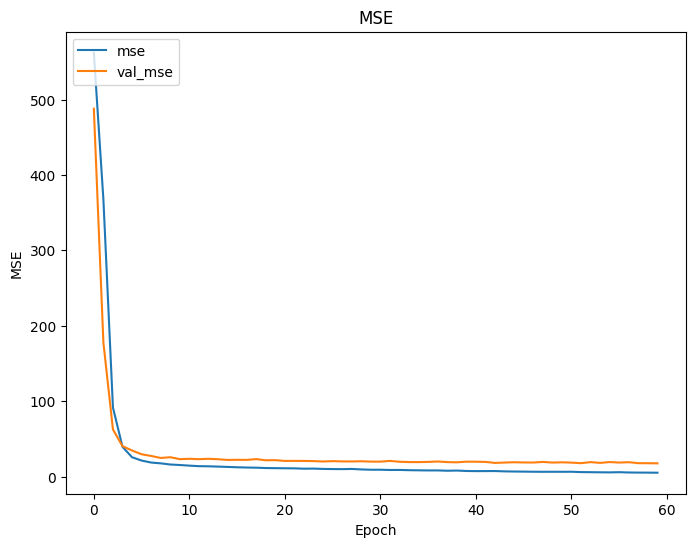

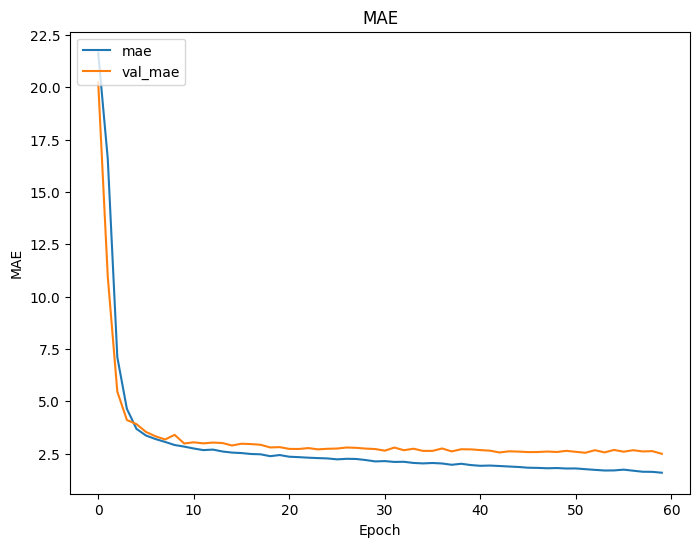

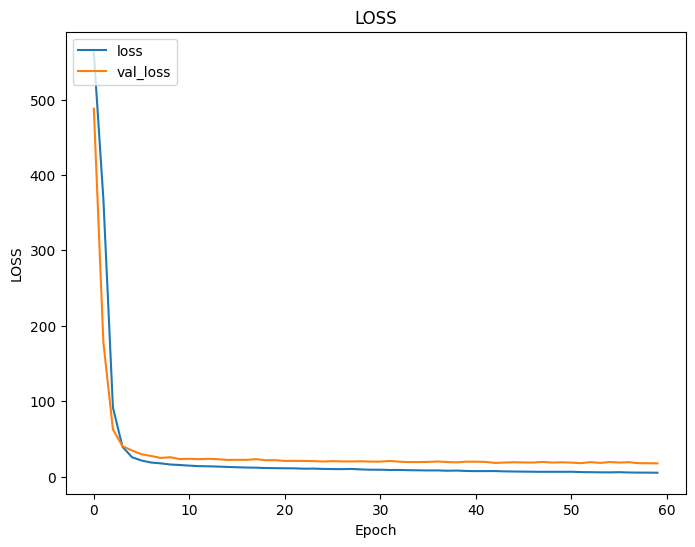

In [15]:
plot_history(history, plot={'MSE' :['mse', 'val_mse'],
                                'MAE' :['mae', 'val_mae'],
                                'LOSS':['loss','val_loss']})

## VI-2 **test de prediction**
## (*prediction test*)

#### mais avant de faire la prediction d'un element , nous devons au prealable normaliser avec les parametre (mean ,std ) 

In [16]:
donnee_A_predit = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
Prix_reel = 10.4

donnee_A_predit=np.array(donnee_A_predit).reshape(1,13) # conversion en tableau numpy 
print (donnee_A_predit.shape)

(1, 13)


In [21]:

predictions = model.predict( donnee_A_predit )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(Prix_reel))

1/1 [==============================] - 0s 18ms/step
Prediction : 10.55 K$
Reality    : 10.40 K$
